In [1]:
import tensorflow as tf

In [ ]:
!pip install tensorflow

In [3]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
from tensorflow.keras import layers

In [6]:
import os

In [7]:
import numpy as np

In [8]:
from PIL import Image

In [9]:
data_dir = "/Users/xiaoxiong/Desktop/tester01"

In [10]:
class_names = ["cataract", "normal", "surgery"]

In [11]:
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    num_samples = len(os.listdir(class_dir))
    print(f"Class: {class_name}, Number of Samples: {num_samples}")

Class: cataract, Number of Samples: 1144
Class: normal, Number of Samples: 776
Class: surgery, Number of Samples: 1144


In [12]:
image_paths = [] 
labels = [] 

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for image_filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_filename)
        image = Image.open(image_path)
        image = image.resize((64, 64)) 
        image = np.array(image) / 255.0  
        image_paths.append(image_path)
        labels.append(class_names.index(class_name))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [16]:
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3) 
    image = tf.image.resize(image, (64, 64))
    image = image / 255.0  
    return image, label

In [17]:
train_dataset = train_dataset.map(load_and_preprocess_image)
validation_dataset = validation_dataset.map(load_and_preprocess_image)
test_dataset = test_dataset.map(load_and_preprocess_image)

In [18]:
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  
])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
epochs = 10  
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/10
67/67 [==============================] - 6s 64ms/step - loss: 0.5385 - accuracy: 0.7789 - val_loss: 0.2182 - val_accuracy: 0.9283
Epoch 2/10
67/67 [==============================] - 6s 66ms/step - loss: 0.2140 - accuracy: 0.9347 - val_loss: 0.2089 - val_accuracy: 0.9283
Epoch 3/10
67/67 [==============================] - 6s 66ms/step - loss: 0.1398 - accuracy: 0.9548 - val_loss: 0.1707 - val_accuracy: 0.9391
Epoch 4/10
67/67 [==============================] - 6s 64ms/step - loss: 0.1099 - accuracy: 0.9599 - val_loss: 0.1466 - val_accuracy: 0.9413
Epoch 5/10
67/67 [==============================] - 6s 63ms/step - loss: 0.1053 - accuracy: 0.9622 - val_loss: 0.1775 - val_accuracy: 0.9391
Epoch 6/10
67/67 [==============================] - 6s 66ms/step - loss: 0.0866 - accuracy: 0.9711 - val_loss: 0.1498 - val_accuracy: 0.9543
Epoch 7/10
67/67 [==============================] - 6s 63ms/step - loss: 0.0613 - accuracy: 0.9813 - val_loss: 0.1452 - val_accuracy: 0.9565
Epoch 8/10
67

In [23]:
from sklearn.metrics import accuracy_score

# 初始化一个列表来存储每个样本的真实标签和预测标签
y_true = []
y_pred = []

# 遍历整个测试集
for image_path, true_label in zip(X_test, y_test):
    # 加载和预处理图像（使用前面的load_and_preprocess_image函数）
    image, _ = load_and_preprocess_image(image_path, true_label)
    
    # 在测试集上进行预测
    predicted_label = model.predict(image[np.newaxis, ...]) 
    
    # 记录真实标签和预测标签
    y_true.append(true_label)
    y_pred.append(np.argmax(predicted_label))


1/1 [==============================] - 0s 10ms/step


In [24]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

15/15 [==============================] - 0s 21ms/step - loss: 0.1527 - accuracy: 0.9522
Test accuracy: 0.9521738886833191


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(y_true, y_pred)

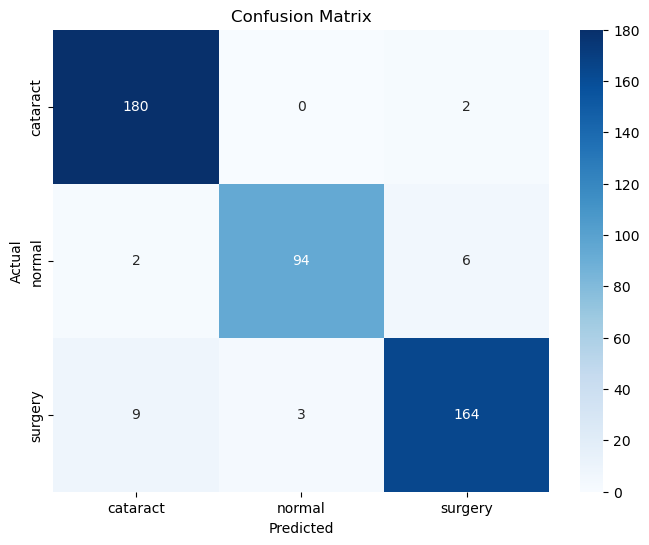

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()